In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
agn_dataframe = pd.read_csv('adjusted_agn_dataframe.csv')

In [3]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats.
# Takes an optional string char for the characters to split by
def convert_to_float_list(str_list, **kwargs):
    char = kwargs.get('char', None)
    debug = kwargs.get('debug', False)
    
    if debug:
        print(str_list + ' foo')
        
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    if debug:
        print(str_list + ' bar')
    
    try:
        return [float(i) for i in str_list.split(char)]
    except ValueError:
        return flag

### Light curve of 0.22032 -7.1532 ZTFG

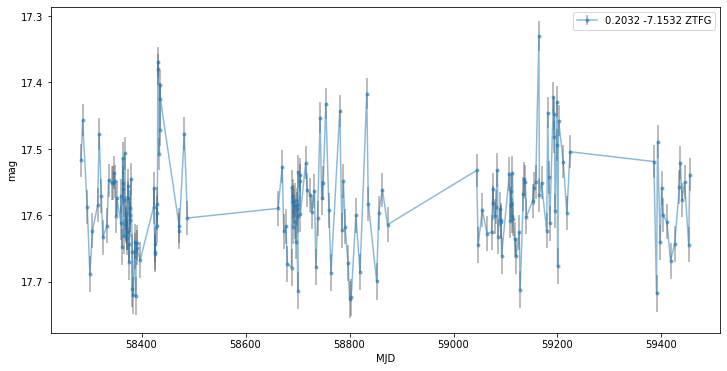

In [4]:
agn_example = pd.read_csv('../../AGN_LightCurves/0.2032_-7.1532_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='0.2032 -7.1532 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### Light curve of 1.0082 70.3217 ZTFG

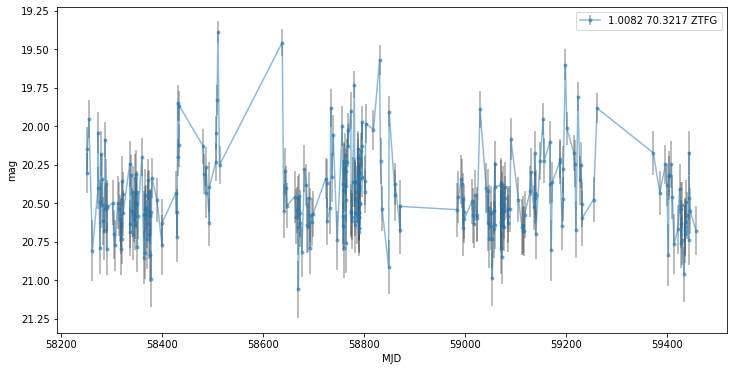

In [5]:
agn_example = pd.read_csv('../../AGN_LightCurves/1.0082_70.3217_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='1.0082 70.3217 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### SNR, LC Length, and log Lbol

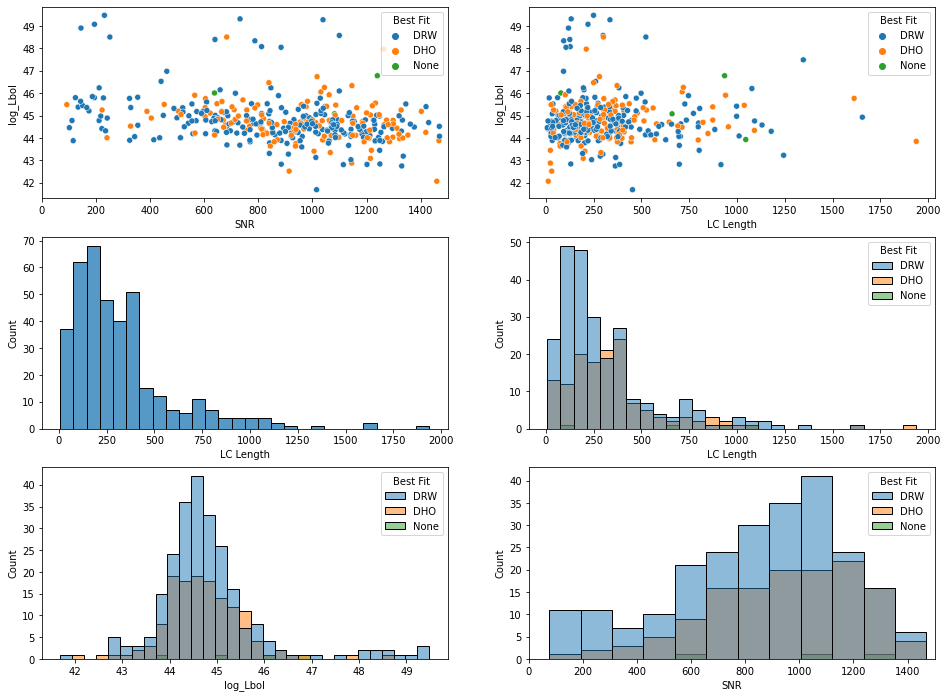

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

row = 0
# SNR vs log LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# LC Length vs log LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])
# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of log LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])
# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 

plt.show()

### DRW tau and amp

In [4]:
best_fits = []
taus = []
amps = []
Lbols = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = convert_to_float_list(row['Best DRW ARMA Fit'])
    Lbol = row['log_Lbol']
    
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)

drw_data = pd.DataFrame({'tau': taus, 'amp': amps, 'log_Lbol': Lbols})

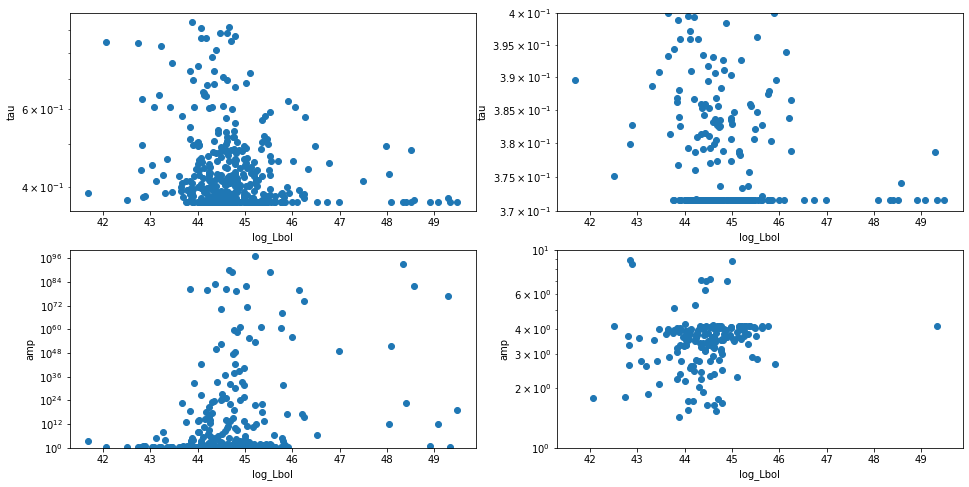

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

row = 0
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 0
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(3.7e-1,4e-1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 1
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e100)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

row = 1
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

plt.show()

### DHO Timescales

In [4]:
# exclude fits for which DHO_chi_sq is infinity
agn_dataframe = agn_dataframe[agn_dataframe['DHO_chi_sq'] != np.inf]

#### log_Lbol vs timescales

Text(0, 0.5, 'log(omega_0)')

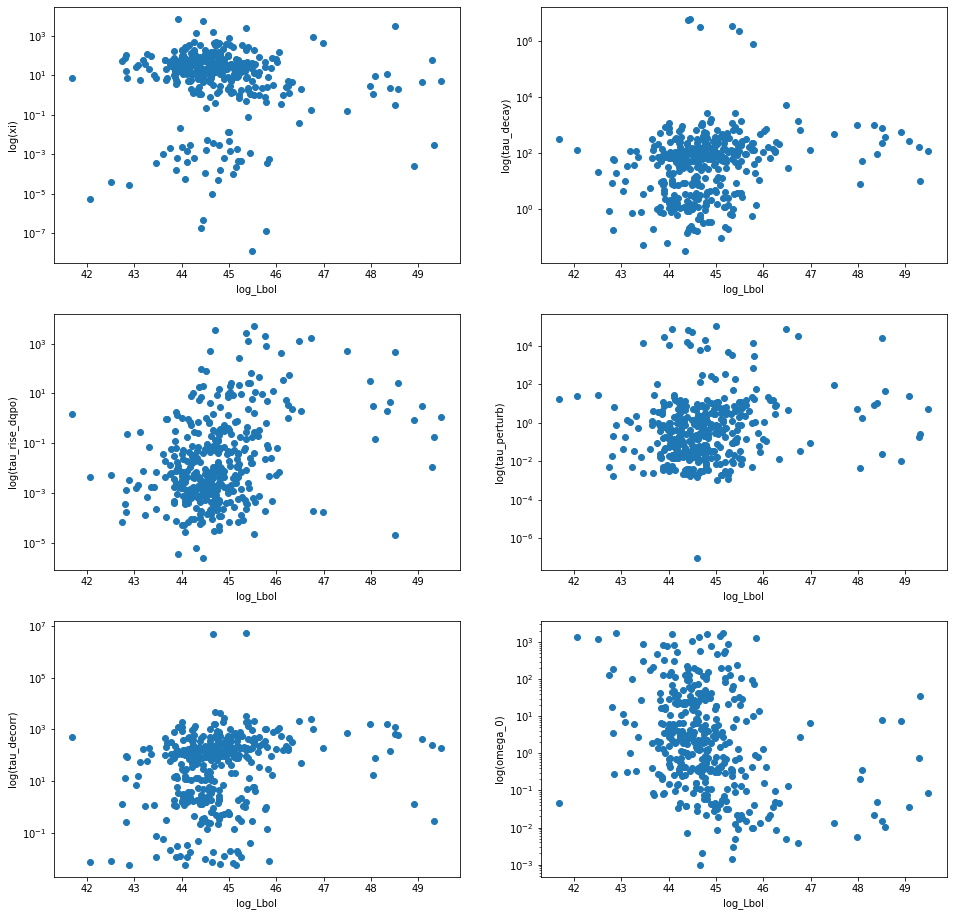

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Lbol'

# xi
row = 0
col = 0
sc = axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

#### log_Mbh vs timescales

Text(0, 0.5, 'log(omega_0)')

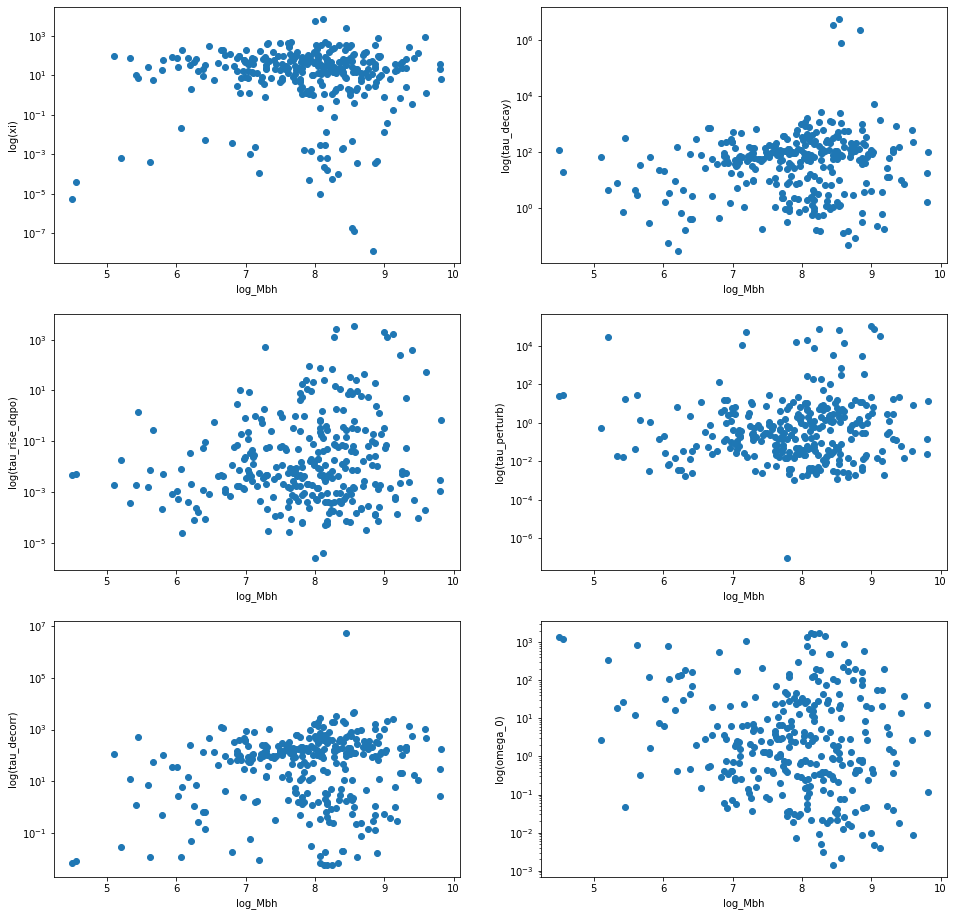

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Mbh'

# xi
row = 0
col = 0
sc = axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

#### Colorbar

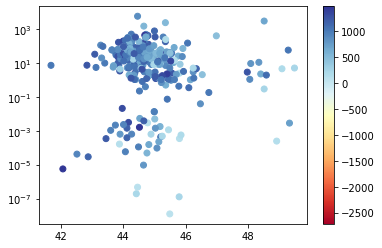

In [7]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data=agn_dataframe, x='log_Lbol', y='xi', c='SNR', cmap=cm)
plt.colorbar(sc)
plt.yscale('log')
plt.show()